In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.metrics import classification_report

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

## try on unbalanced data 

In [29]:
train_data_imb=pd.read_csv('HT7.csv')
train_data_imb.head()

,tweet,OFF,VLG,VIO,HS_HS1,HS_HS2,HS_HS3,HS_HS5,HS_HS6,HS_NOT_HS
0,وصارت فطاير البقالات غذاء صحي ابهام متجه لاسفل 🏻,0,0,0,0,0,0,0,0,1
1,مستخدم روحي لبريده تلقين اشباه كثير ماحد زيكم...,1,0,0,0,0,0,0,0,1
2,مستخدم مش باين حاجه خالص وجه منصدم مش عارف بق...,0,0,0,0,0,0,0,0,1
3,اليوم الاثنين تصفيق يقولك المسلمين عندهم خاله...,0,0,0,0,0,0,0,0,1
4,حمدلله ماحطها فمي اساسا وجه بقناع طبي وجه مشمئز,0,0,0,0,0,0,0,0,1


In [30]:
test_data=pd.read_csv('off_comp_test.csv')
test_data.head()

,tweet,OFF,HS,VLG,VIO
0,Ø¯Ø§Ù„ÙŠØ§ Ù…Ø¨Ø§Ø±Ùƒ Ù…Ø§Ø¯Ø±ÙŠ Ù„ÙŠØ´ ØªÙ‚Ø...,0,NOT_HS,0,0
1,مستخدم Ø§Ø¨Ø¯ÙŠØª Ø§Ù„Ø³Ù†Ø§Ø¨ Ø§Ù„Ø¬Ø¯ÙŠØ¯ â...,0,NOT_HS,0,0
2,مستخدم Ù‡ÙŠÙŠÙ‡ ÙˆØ§Ù„Ù„Ù‡ ÙˆØ§Ø§Ø§ÙŠØ¯Ø¯ ðŸ”...,0,NOT_HS,0,0
3,Ø§ÙƒÙŠØ¯ Ø§Ø مسجل Ø³ Ø´ÙŠ ðŸ˜¤,0,NOT_HS,0,0
4,Ù…Ø§Ø¨ÙŠ Ø´ÙŠ Ø§Ù„Ø­ÙŠÙ† ØºÙŠØ± ÙØ±Ø§Ø´ÙŠðŸ˜£,0,NOT_HS,0,0


In [33]:
X_train, X_val, Y_train, Y_val = train_test_split(train_data_imb['tweet'],train_data_imb['OFF'], test_size=0.1)
X_train.shape, X_val.shape 

((7699,), (856,))

In [37]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [38]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

l = tf.keras.layers.Dropout(0.1, name="dropout1")(outputs['sequence_output'])
l = tf.keras.layers.Dense(128, activation='relu', name="D1")(l)

l = tf.keras.layers.Dropout(0.1, name="dropout2")(l)
l = tf.keras.layers.Dense(64, activation='relu', name="D2")(l)

l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [39]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [42]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history= model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=30)

Epoch 1/30
241/241 [==============================] - 124s 479ms/step - loss: 0.6359 - accuracy: 0.6446 - val_loss: 0.6180 - val_accuracy: 0.6546
Epoch 2/30
241/241 [==============================] - 116s 483ms/step - loss: 0.6247 - accuracy: 0.6535 - val_loss: 0.6310 - val_accuracy: 0.6543
Epoch 3/30
241/241 [==============================] - 115s 476ms/step - loss: 0.6205 - accuracy: 0.6606 - val_loss: 0.6128 - val_accuracy: 0.6760
Epoch 4/30
241/241 [==============================] - 121s 503ms/step - loss: 0.6142 - accuracy: 0.6633 - val_loss: 0.6046 - val_accuracy: 0.6730
Epoch 5/30
241/241 [==============================] - 117s 487ms/step - loss: 0.6129 - accuracy: 0.6656 - val_loss: 0.5994 - val_accuracy: 0.6790
Epoch 6/30
241/241 [==============================] - 118s 488ms/step - loss: 0.6074 - accuracy: 0.6709 - val_loss: 0.6195 - val_accuracy: 0.6574
Epoch 7/30
241/241 [==============================] - 121s 503ms/step - loss: 0.6095 - accuracy: 0.6691 - val_loss: 0.6059 -

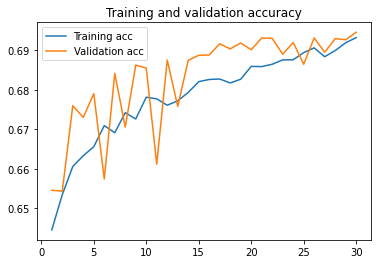

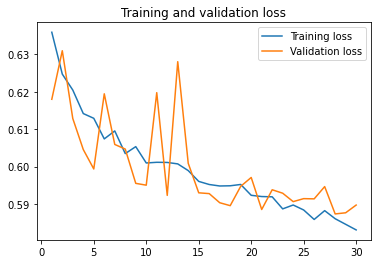

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [49]:
y_pred = np.around(model.predict(test_data.tweet))

In [50]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(np.array(test_data.OFF), y_pred[:,-1,:].flatten())

print(cf_matrix)

[[856   6]
 [400   3]]


<AxesSubplot:>

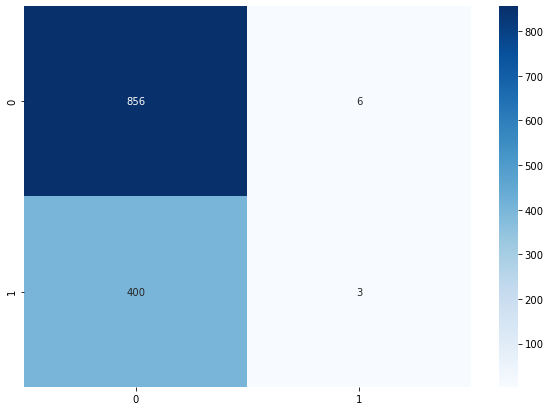

In [53]:
plt.figure(figsize = (10,7))
sn.heatmap(cf_matrix, annot=True,cmap='Blues', fmt='g')

In [51]:
target_names = ['off', 'not']
print(classification_report(np.array(test_data.OFF),  y_pred[:,-1,:].flatten(),target_names=target_names))

              precision    recall  f1-score   support

         off       0.68      0.99      0.81       862
         not       0.33      0.01      0.01       403

    accuracy                           0.68      1265
   macro avg       0.51      0.50      0.41      1265
weighted avg       0.57      0.68      0.56      1265



## try on balanced(undersampled) data

In [5]:
data=pd.read_csv('undersampled_off_data_HT8.csv')
data.head()

,tweet,OFF
0,درس الفيزياء وحشني جدااا وجه بدموع الفرح وجه ب...,0
1,مستخدم صافيه صافيه ههههههههههههه وجه بدموع ال...,0
2,اذا مابيسوي حادث يبغا يتضارب الخلق مع هالصبح ل...,1
3,مستخدم هووه انتم ملعب مو مستنقع وجه بدموع الف...,1
4,أجمل عبارات تحفيزية للأردنيين تم إيداع الراتب ...,0


In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(data['tweet'],data['OFF'], test_size=0.1)
X_train.shape, X_test.shape 

((5515,), (613,))

In [7]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [18]:
tf.saved_model.save(bert_preprocess, 'D:/projects data/NLP/bert/bert_preprocess')
tf.saved_model.save(bert_encoder, 'D:/projects data/NLP/bert/bert_encoder')


INFO:tensorflow:Assets written to: D:/projects data/NLP/bert/bert_preprocess\assets


INFO:tensorflow:Assets written to: D:/projects data/NLP/bert/bert_preprocess\assets


INFO:tensorflow:Assets written to: D:/projects data/NLP/bert/bert_encoder\assets


INFO:tensorflow:Assets written to: D:/projects data/NLP/bert/bert_encoder\assets


In [33]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

l = tf.keras.layers.Dropout(0.1, name="dropout1")(outputs['sequence_output'])
l = tf.keras.layers.Dense(128, activation='relu', name="D1")(l)

l = tf.keras.layers.Dropout(0.1, name="dropout2")(l)
l = tf.keras.layers.Dense(64, activation='relu', name="D2")(l)

l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [34]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                    

In [35]:
X_train.shape,y

5515

In [39]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1, shuffle=True)

In [40]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history= model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=30)

Epoch 1/30
156/156 [==============================] - 68s 420ms/step - loss: 0.6700 - accuracy: 0.5889 - val_loss: 0.6608 - val_accuracy: 0.6055
Epoch 2/30
156/156 [==============================] - 65s 419ms/step - loss: 0.6563 - accuracy: 0.6127 - val_loss: 0.6471 - val_accuracy: 0.6246
Epoch 3/30
156/156 [==============================] - 65s 416ms/step - loss: 0.6520 - accuracy: 0.6178 - val_loss: 0.6579 - val_accuracy: 0.6078
Epoch 4/30
156/156 [==============================] - 65s 417ms/step - loss: 0.6505 - accuracy: 0.6202 - val_loss: 0.6437 - val_accuracy: 0.6354
Epoch 5/30
156/156 [==============================] - 65s 420ms/step - loss: 0.6497 - accuracy: 0.6211 - val_loss: 0.6437 - val_accuracy: 0.6353
Epoch 6/30
156/156 [==============================] - 66s 423ms/step - loss: 0.6449 - accuracy: 0.6281 - val_loss: 0.6387 - val_accuracy: 0.6364
Epoch 7/30
156/156 [==============================] - 66s 426ms/step - loss: 0.6465 - accuracy: 0.6271 - val_loss: 0.6375 - val_ac

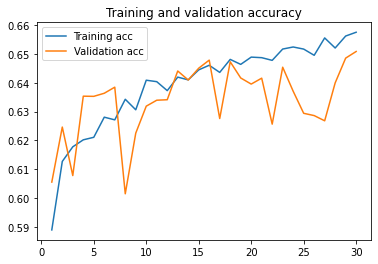

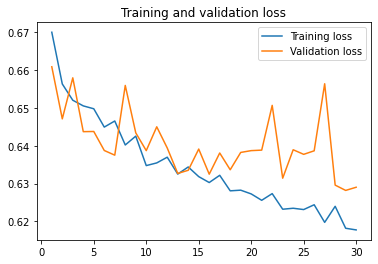

In [48]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [50]:
model.evaluate(X_test, Y_test)

20/20 [==============================] - 7s 343ms/step - loss: 0.6487 - accuracy: 0.6353


[0.6486954092979431, 0.6352977156639099]

In [74]:
y_pred= model.predict(X_test)
y_pred=np.around(y_pred)

In [12]:
y_pred.shape,Y_test.shape

((613, 128, 1), (613,))

In [20]:
y_pred[:,-1,:].shape

(613, 1)

In [61]:

y_pred2 = pickle.load(open("y_pred.pkl", 'rb'))
Y_test2 = pickle.load(open("Y_test.pkl", 'rb'))

In [62]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(Y_test2, y_pred2[:,-1,:].flatten())

print(cf_matrix)

[[223  78]
 [142 170]]


<AxesSubplot:>

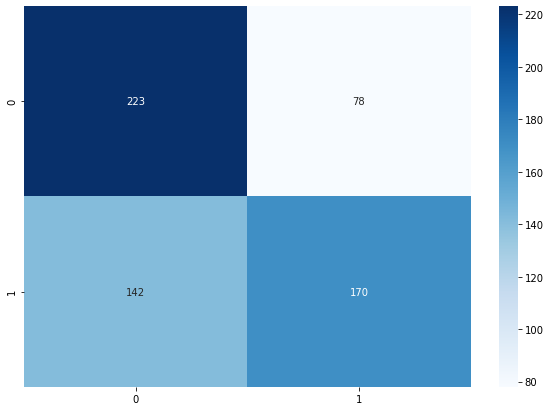

In [63]:
plt.figure(figsize = (10,7))
sn.heatmap(cf_matrix, annot=True,cmap='Blues', fmt='g')

In [23]:
from sklearn.metrics import classification_report
target_names = ['off', 'not']
print(classification_report(Y_test,  y_pred[:,-1,:].flatten(),target_names=target_names))

              precision    recall  f1-score   support

         off       0.61      0.74      0.67       301
         not       0.69      0.54      0.61       312

    accuracy                           0.64       613
   macro avg       0.65      0.64      0.64       613
weighted avg       0.65      0.64      0.64       613



## try on balanced(oversampled) data

In [65]:
train_data_over=pd.read_csv('oversampled_off_data_HT8.csv')
train_data_over.head()

,tweet,OFF
0,وصارت فطاير البقالات غذاء صحي ابهام متجه لاسفل 🏻,0
1,مستخدم روحي لبريده تلقين اشباه كثير ماحد زيكم...,1
2,مستخدم مش باين حاجه خالص وجه منصدم مش عارف بق...,0
3,اليوم الاثنين تصفيق يقولك المسلمين عندهم خاله...,0
4,حمدلله ماحطها فمي اساسا وجه بقناع طبي وجه مشمئز,0


In [66]:
test_data=pd.read_csv('off_comp_test.csv')
test_data.head()

,tweet,OFF,HS,VLG,VIO
0,Ø¯Ø§Ù„ÙŠØ§ Ù…Ø¨Ø§Ø±Ùƒ Ù…Ø§Ø¯Ø±ÙŠ Ù„ÙŠØ´ ØªÙ‚Ø...,0,NOT_HS,0,0
1,مستخدم Ø§Ø¨Ø¯ÙŠØª Ø§Ù„Ø³Ù†Ø§Ø¨ Ø§Ù„Ø¬Ø¯ÙŠØ¯ â...,0,NOT_HS,0,0
2,مستخدم Ù‡ÙŠÙŠÙ‡ ÙˆØ§Ù„Ù„Ù‡ ÙˆØ§Ø§Ø§ÙŠØ¯Ø¯ ðŸ”...,0,NOT_HS,0,0
3,Ø§ÙƒÙŠØ¯ Ø§Ø مسجل Ø³ Ø´ÙŠ ðŸ˜¤,0,NOT_HS,0,0
4,Ù…Ø§Ø¨ÙŠ Ø´ÙŠ Ø§Ù„Ø­ÙŠÙ† ØºÙŠØ± ÙØ±Ø§Ø´ÙŠðŸ˜£,0,NOT_HS,0,0


In [67]:
X_train, X_val, Y_train, Y_val = train_test_split(train_data_over['tweet'],train_data_over['OFF'], test_size=0.1)
X_train.shape, X_val.shape 

((9883,), (1099,))

In [68]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [69]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

l = tf.keras.layers.Dropout(0.1, name="dropout1")(outputs['sequence_output'])
l = tf.keras.layers.Dense(128, activation='relu', name="D1")(l)

l = tf.keras.layers.Dropout(0.1, name="dropout2")(l)
l = tf.keras.layers.Dense(64, activation='relu', name="D2")(l)

l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [70]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_2 (KerasLayer)     {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                

In [71]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history= model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=30)

Epoch 1/30
309/309 [==============================] - 155s 475ms/step - loss: 0.6719 - accuracy: 0.5857 - val_loss: 0.6482 - val_accuracy: 0.6220
Epoch 2/30
309/309 [==============================] - 146s 474ms/step - loss: 0.6537 - accuracy: 0.6152 - val_loss: 0.6564 - val_accuracy: 0.6074
Epoch 3/30
309/309 [==============================] - 147s 475ms/step - loss: 0.6486 - accuracy: 0.6227 - val_loss: 0.6438 - val_accuracy: 0.6282
Epoch 4/30
309/309 [==============================] - 148s 479ms/step - loss: 0.6437 - accuracy: 0.6291 - val_loss: 0.6442 - val_accuracy: 0.6468
Epoch 5/30
309/309 [==============================] - 148s 478ms/step - loss: 0.6418 - accuracy: 0.6316 - val_loss: 0.6276 - val_accuracy: 0.6483
Epoch 6/30
309/309 [==============================] - 152s 491ms/step - loss: 0.6375 - accuracy: 0.6355 - val_loss: 0.6281 - val_accuracy: 0.6500
Epoch 7/30
309/309 [==============================] - 148s 480ms/step - loss: 0.6365 - accuracy: 0.6388 - val_loss: 0.6275 -

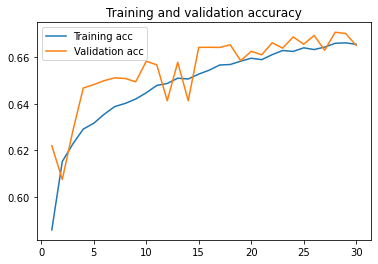

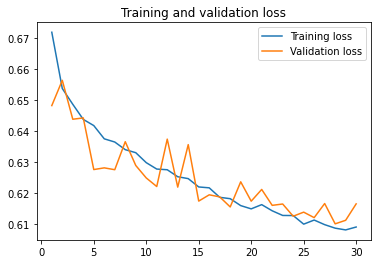

In [72]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [73]:
y_pred = np.around(model.predict(test_data.tweet))
#Generate the confusion matrix
cf_matrix = confusion_matrix(np.array(test_data.OFF), y_pred[:,-1,:].flatten())

print(cf_matrix)

[[162 700]
 [109 294]]


<AxesSubplot:>

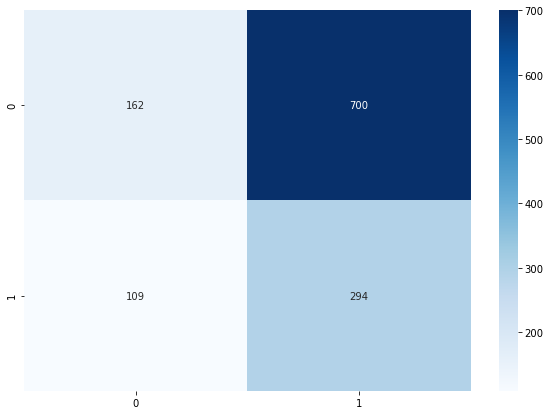

In [74]:
plt.figure(figsize = (10,7))
sn.heatmap(cf_matrix, annot=True,cmap='Blues', fmt='g')

In [75]:
target_names = ['off', 'not']
print(classification_report(np.array(test_data.OFF),  y_pred[:,-1,:].flatten(),target_names=target_names))

              precision    recall  f1-score   support

         off       0.60      0.19      0.29       862
         not       0.30      0.73      0.42       403

    accuracy                           0.36      1265
   macro avg       0.45      0.46      0.35      1265
weighted avg       0.50      0.36      0.33      1265

